The poisson distribution can be simulated from the uniform distribution and exponential distribution.  However, the usual numpy functions are optimised for this so use these instead.

In [1]:
# import libaries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
# set to plot automatically
%matplotlib inline
# set font size of charts
sns.set(font_scale=1.5)

In [2]:
# set random state so repeatable results
np.random.seed(42)

# 1. Simulate poisson from uniform distribution

The poisson distribution can be generated from the uniform distribution by looking up a uniform random variable's value in a table of the poisson's cumulative density function probilities.

In [3]:
# set distribution parameter
lam =2
# set number of samples
samples=1000

In [4]:
# generate 1000 samples from uniform distribution, on range 0-1
uniform_random = np.random.uniform(0,1,size=samples)

In [5]:
# create x and y values for the actual poisson cdf
x_cdf = np.arange(poisson.ppf(0.01, lam),poisson.ppf(0.9999999, lam))
y_cdf = poisson.cdf(x_cdf,lam)
# insert a 0 to the end so we get the full range of cdf values
y_cdf = np.append(y_cdf,1)

In [6]:
# bin the uniform values based on where they fall in the cdf
# digitize returns the indices of the bins to which each value in input array belongs.
values = np.digitize(uniform_random,y_cdf,right=True)
# create a frequency count for each value
unique_elements, counts_elements = np.unique(values, return_counts=True);

In [7]:
# create x and y values for the actual pdf so we can plot them
x_pdf = np.arange(poisson.ppf(0.01, lam),poisson.ppf(0.9999, lam))
y_pdf = poisson.pmf(x_pdf,lam)

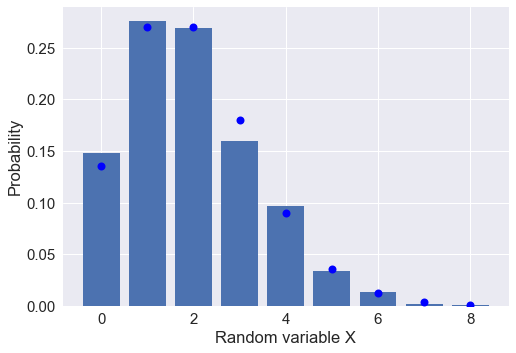

In [8]:
# plot the simulated values
plt.bar(unique_elements,counts_elements/samples);
plt.plot(x_pdf, y_pdf, 'bo', ms=8, label='poisson pmf')
plt.xlabel('Random variable X');
plt.ylabel('Probability');

# 2. Simulate poisson from the exponential distribution

The poisson distribution can also be generated from the exponential distribution. First inter-arrival times are generated from the exponential distribution. Then the amount of events occuring in each time unit is calculated (also known as a poisson process).

In [9]:
# set distribution parameter (arrivals oer time unit)
scale = 0.5
# generate samples from an exponential distribution
exponential_random = np.random.exponential(scale=scale,size=samples)

In [10]:
# calculate the arrival time rounded up and the max arrival time
arrival_times=np.ceil(np.cumsum(exponential_random))
max_arrival_time=arrival_times.max()

In [11]:
# count the number of arrivals in each time period
unique_elements, counts_elements = np.unique(arrival_times,return_counts=True)

In [12]:
# calculate the number of time periods without any arrivals
poisson_zero=(~np.in1d(np.arange(1,max_arrival_time+1,1), unique_elements)).sum()

In [13]:
# count the number of events within a time period
poisson_elements, poisson_counts = np.unique(counts_elements,return_counts=True)

In [14]:
# insert the time periods without any arrivals
poisson_elements=np.insert(poisson_elements,0,0)
poisson_counts=np.insert(poisson_counts,0,poisson_zero)

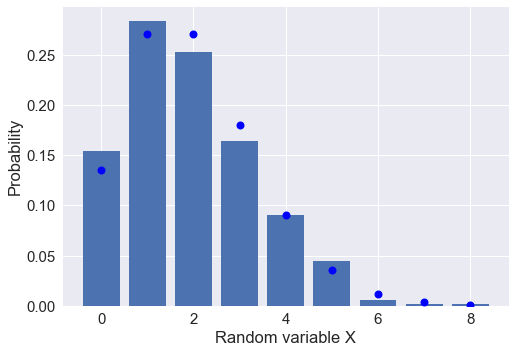

In [15]:
# plot the simulated values
plt.bar(poisson_elements,poisson_counts/poisson_counts.sum());
plt.plot(x_pdf, y_pdf, 'bo', ms=8, label='poisson pmf')
plt.xlabel('Random variable X');
plt.ylabel('Probability');